In [3]:
cd website

/Users/ReddingSkinnyRobot/Galvanize/capstone_project/website


In [123]:
from google_api_functions import *
import pandas as pd
import numpy as np
import yaml
import json, requests
from recommender_model import *
from PIL import Image
import base64

In [47]:
with open('/Users/ReddingSkinnyRobot/.secrets/google_api.yaml') as f:
    google_secrets = yaml.load(f)

In [60]:
search_data['results'][0]['photos'][0]['photo_reference']

'CmRaAAAAggKHIzY09cDdHRtjmFaUwDyRf8fghcxTZc3mnm4_IoVPyAqtYyrtnjOd04UCsZDMCHI-VMTsfUmETbXH5D32JgqyJZidC0qCTqpXK8SZDo04-menrnjQA82wpQwJmVQzEhCHRFGaJTOU2Sdryp5uEz4AGhTXBAeSneN0XMO4U5WSIceDPrcs_w'

OSError: cannot identify image file 'shop_images/0.jpg'

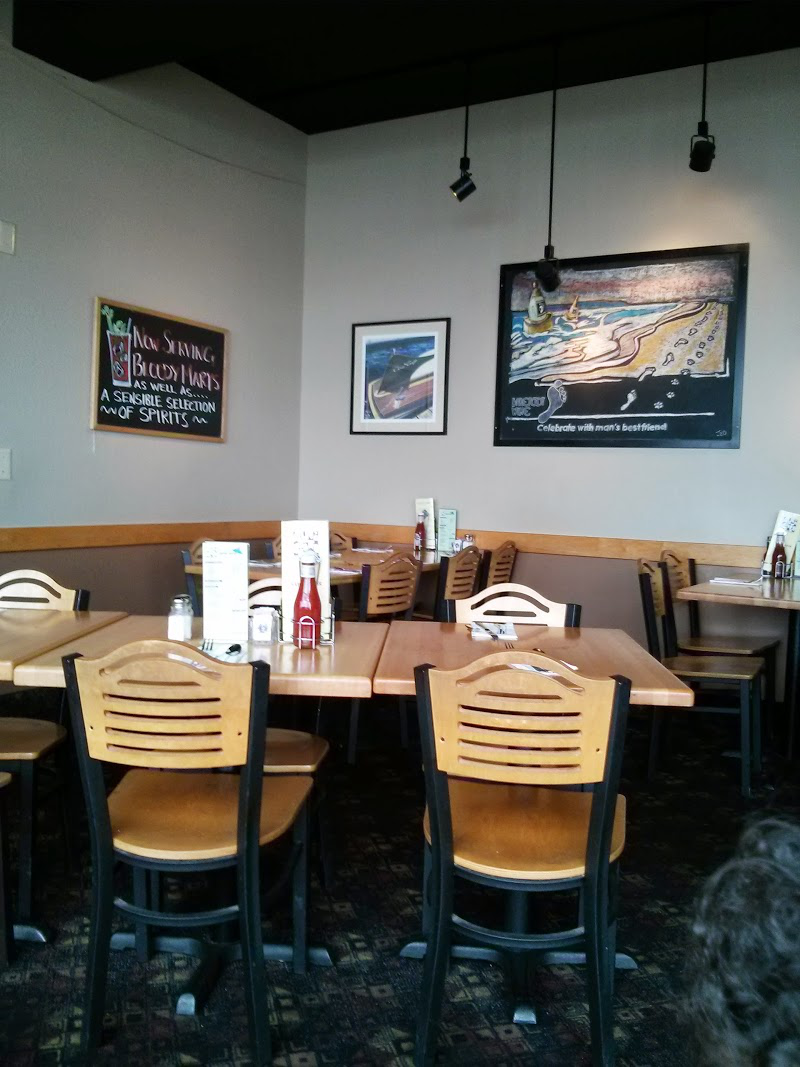

In [204]:
#DONT EVER DELETE!!!
with open('shop_images/0.jpg', 'rb') as f:
    byt = base64.decodebytes(f.read())
    bio = BytesIO(byt)
Image.open(bio)

In [205]:
x = get_google_photo(47.613288, -122.308731, 'Tougo Coffee Co.', google_secrets['key'])

In [208]:
type(x)

bytes

In [206]:
image = Image.open(BytesIO(x))

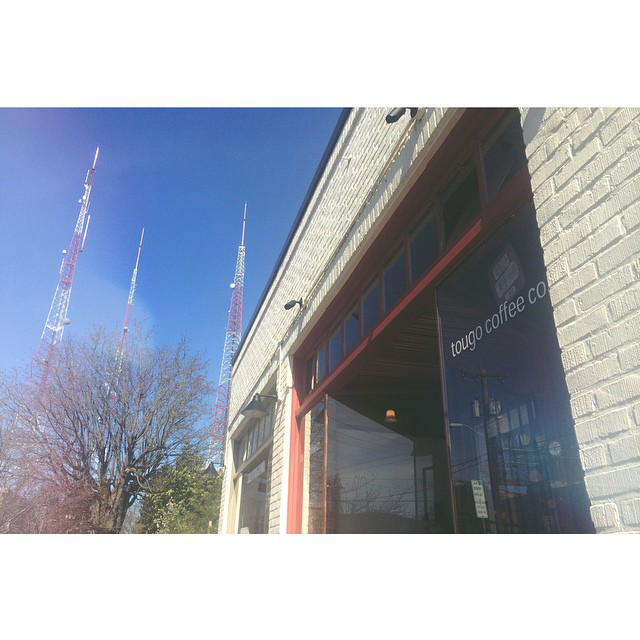

In [207]:
image

In [162]:
image.save('shop_images/1.jpg')

In [164]:
from pathlib import Path

In [165]:
shop_id = 10
image = Path('shop_images/{}.jpg'.format(shop_id))

In [175]:
image.read_bytes()

b'b\'\\xff\\xd8\\xff\\xe0\\x00\\x10JFIF\\x00\\x01\\x01\\x00\\x00\\x01\\x00\\x01\\x00\\x00\\xff\\xe1\\x00lExif\\x00\\x00II*\\x00\\x08\\x00\\x00\\x00\\x03\\x00\\x12\\x01\\x03\\x00\\x01\\x00\\x00\\x00\\x01\\x00\\x00\\x001\\x01\\x02\\x00\\x07\\x00\\x00\\x002\\x00\\x00\\x00i\\x87\\x04\\x00\\x01\\x00\\x00\\x00:\\x00\\x00\\x00\\x00\\x00\\x00\\x00Google\\x00\\x00\\x03\\x00\\x00\\x90\\x07\\x00\\x04\\x00\\x00\\x000220\\x02\\xa0\\x04\\x00\\x01\\x00\\x00\\x00X\\x02\\x00\\x00\\x03\\xa0\\x04\\x00\\x01\\x00\\x00\\x00\\x90\\x01\\x00\\x00\\x00\\x00\\x00\\x00\\xff\\xdb\\x00\\x84\\x00\\x03\\x02\\x02\\n\\n\\n\\x08\\x08\\x08\\n\\x08\\x08\\x08\\x08\\n\\x08\\n\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\x08\\n\\x08\\x08\\x08\\x08\\n\\n\\n\\x08\\x08\\x0c\\r\\n\\x08\\r\\x08\\x08\\n\\x08\\x01\\x03\\x04\\x04\\x06\\x05\\x06\\n\\x06\\x06\\n\\r\\r\\x0c\\x0c\\r\\r\\r\\r\\r\\r\\x0c\\r\\r\\x0c\\r\\x0c\\x0c\\r\\x0c\\x0c\\x0c\\x0

In [177]:
with open('static/images/default_shop_image.jpg', 'rb') as f1:
    f2 = f1.read()
    default_shop_image = base64.b64encode(bytearray(f2)).decode()

In [181]:
(default_shop_image.encode())

b'/9j/4Rl9RXhpZgAATU0AKgAAAAgADAEAAAMAAAABBmgAAAEBAAMAAAABA8AAAAECAAMAAAADAAAAngEGAAMAAAABAAIAAAESAAMAAAABAAEAAAEVAAMAAAABAAMAAAEaAAUAAAABAAAApAEbAAUAAAABAAAArAEoAAMAAAABAAIAAAExAAIAAAAfAAAAtAEyAAIAAAAUAAAA04dpAAQAAAABAAAA6AAAASAACAAIAAgACvyAAAAnEAAK/IAAACcQQWRvYmUgUGhvdG9zaG9wIENDIChNYWNpbnRvc2gpADIwMTg6MDE6MjUgMTE6MzQ6NDIAAAAEkAAABwAAAAQwMjIxoAEAAwAAAAEAAQAAoAIABAAAAAEAAAJYoAMABAAAAAEAAAGQAAAAAAAAAAYBAwADAAAAAQAGAAABGgAFAAAAAQAAAW4BGwAFAAAAAQAAAXYBKAADAAAAAQACAAACAQAEAAAAAQAAAX4CAgAEAAAAAQAAF/cAAAAAAAAASAAAAAEAAABIAAAAAf/Y/+0ADEFkb2JlX0NNAAH/7gAOQWRvYmUAZIAAAAAB/9sAhAAMCAgICQgMCQkMEQsKCxEVDwwMDxUYExMVExMYEQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMAQ0LCw0ODRAODhAUDg4OFBQODg4OFBEMDAwMDBERDAwMDAwMEQwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAz/wAARCABrAKADASIAAhEBAxEB/90ABAAK/8QBPwAAAQUBAQEBAQEAAAAAAAAAAwABAgQFBgcICQoLAQABBQEBAQEBAQAAAAAAAAABAAIDBAUGBwgJCgsQAAEEAQMCBAIFBwYIBQMMMwEAAhEDBCESMQVBUWETInGBMgYUkaGxQiMkFVLBYjM0coLRQwclklPw4fFjczUWorKDJkSTVGRFwqN0NhfSVeJl8rOEw9N14/NGJ5SkhbSVxNTk9K